<a href="https://colab.research.google.com/github/Jamaleldin/MRNET-for-Knee-Diagnosis/blob/contribution/MRI_Contrast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Needed Imports

In [0]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten, BatchNormalization, Dropout
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import optimizers

# Extractor Model

In [0]:
# This is the feature extractor model based on the architecture used in the paper.
def extractor():
    model = Sequential()
    # The main architecture is based on cnn layers of 3x3 filters
    # The extractor consisits of 3 similar blocks:
    # The first block has 32 filters in convolutional layers, the second has 64 and the third has 128
    # Each block has 2 convolutional layers separated by batch normalizations and a relu activation layer
    # between each 2 blocks there is a max pooling layer of size 2x2
    
    # First block
    model.add(Conv2D(32, (3, 3), padding='same', input_shape=(256,256,3)))
    model.add(BatchNormalization(axis=1))
    model.add(Activation('relu'))
    model.add(Conv2D(32, (3, 3)))
    model.add(BatchNormalization(axis=1))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    # Second block
    model.add(Conv2D(64, (3, 3), padding='same'))
    model.add(BatchNormalization(axis=1))
    model.add(Activation('relu'))
    model.add(Conv2D(64, (3, 3)))
    model.add(BatchNormalization(axis=1))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    # Third block
    model.add(Conv2D(128, (3, 3), padding='same'))
    model.add(BatchNormalization(axis=1))
    model.add(Activation('relu'))
    model.add(Conv2D(128, (3, 3)))
    model.add(BatchNormalization(axis=1))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2))) 
    # forth block
    model.add(Conv2D(256, (3, 3), padding='same'))
    model.add(BatchNormalization(axis=1))
    model.add(Activation('relu'))
    model.add(Conv2D(256, (3, 3)))
    model.add(BatchNormalization(axis=1))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
   
    # This part is to be removed as the same approach used before
    model.add(Flatten(name='flat_021'))
    model.add(Dropout(0.5))
    model.add(Dense(512,name='dense_022'))
    model.add(BatchNormalization(axis=1,name='batch_0023'))
    model.add(Activation('relu',name='relu_024'))
    model.add(Dense(1,name='dense_025'))
    model.add(Activation('sigmoid',name='sig_026'))

    model.compile(loss='binary_crossentropy', optimizer='nadam', metrics=['acc'])
    return model

In [17]:
extractor().summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 256, 256, 32)      896       
_________________________________________________________________
batch_normalization_16 (Batc (None, 256, 256, 32)      1024      
_________________________________________________________________
activation_16 (Activation)   (None, 256, 256, 32)      0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 254, 254, 32)      9248      
_________________________________________________________________
batch_normalization_17 (Batc (None, 254, 254, 32)      1016      
_________________________________________________________________
activation_17 (Activation)   (None, 254, 254, 32)      0         
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 127, 127, 32)     

In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [4]:
%cd '/content/drive/My Drive/Colab Notebooks'
!pip install import-ipynb

/content/drive/My Drive/Colab Notebooks
  Created wheel for import-ipynb: filename=import_ipynb-0.1.3-cp36-none-any.whl size=2976 sha256=34dcba7a36a113b360c7c7a7722e3b077dfea9f8bb05482dda9e440b5e97dc70
  Stored in directory: /root/.cache/pip/wheels/b4/7b/e9/a3a6e496115dffdb4e3085d0ae39ffe8a814eacc44bbf494b5
Successfully built import-ipynb


In [5]:
import import_ipynb
import MRNet_models_processing as processing

importing Jupyter notebook from MRNet_models_processing.ipynb


Using TensorFlow backend.


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
unzip:  cannot find or open /content/drive/My Drive/MRNET data set/MRNet-v1.0.zip, /content/drive/My Drive/MRNET data set/MRNet-v1.0.zip.zip or /content/drive/My Drive/MRNET data set/MRNet-v1.0.zip.ZIP.


# Train Extractors


### Sagittal Abnormal

Epoch 1/50
51/51 [==============================] - ETA: 0s - loss: 0.9340 - acc: 0.6903
Epoch 00001: val_acc improved from -inf to 0.80531, saving model to /content/drive/My Drive/Models/contrust/Extractor/sagittal_abnormal.h5
51/51 [==============================] - 28s 555ms/step - loss: 0.9340 - acc: 0.6903 - val_loss: 63.1224 - val_acc: 0.8053
Epoch 2/50
51/51 [==============================] - ETA: 0s - loss: 0.5656 - acc: 0.7552
Epoch 00002: val_acc did not improve from 0.80531
51/51 [==============================] - 22s 426ms/step - loss: 0.5656 - acc: 0.7552 - val_loss: 4.6985 - val_acc: 0.8053
Epoch 3/50
51/51 [==============================] - ETA: 0s - loss: 0.5067 - acc: 0.7925
Epoch 00003: val_acc did not improve from 0.80531
51/51 [==============================] - 21s 418ms/step - loss: 0.5067 - acc: 0.7925 - val_loss: 3.7594 - val_acc: 0.8053
Epoch 4/50
51/51 [==============================] - ETA: 0s - loss: 0.5327 - acc: 0.7856
Epoch 00004: val_acc did not improve f

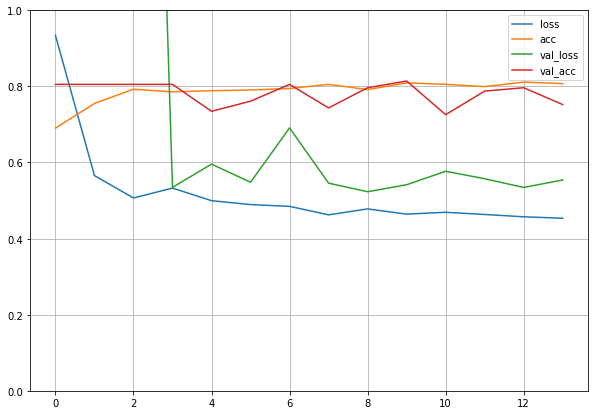

In [9]:
contrast_cnn = extractor()
processing.train_extractor(contrast_cnn, processing.contrust, processing.sagittal, processing.abnormal)


### Sagittal ACL

Epoch 1/50
51/51 [==============================] - ETA: 0s - loss: 1.0527 - acc: 0.6912
Epoch 00001: val_acc improved from -inf to 0.84956, saving model to /content/drive/My Drive/Models/contrust/Extractor/sagittal_acl.h5
51/51 [==============================] - 23s 459ms/step - loss: 1.0527 - acc: 0.6912 - val_loss: 23.8414 - val_acc: 0.8496
Epoch 2/50
51/51 [==============================] - ETA: 0s - loss: 0.6141 - acc: 0.7738
Epoch 00002: val_acc did not improve from 0.84956
51/51 [==============================] - 22s 435ms/step - loss: 0.6141 - acc: 0.7738 - val_loss: 2.3998 - val_acc: 0.8496
Epoch 3/50
51/51 [==============================] - ETA: 0s - loss: 0.5405 - acc: 0.7915
Epoch 00003: val_acc did not improve from 0.84956
51/51 [==============================] - 22s 426ms/step - loss: 0.5405 - acc: 0.7915 - val_loss: 1.3778 - val_acc: 0.8496
Epoch 4/50
51/51 [==============================] - ETA: 0s - loss: 0.5394 - acc: 0.7984
Epoch 00004: val_acc did not improve from 0

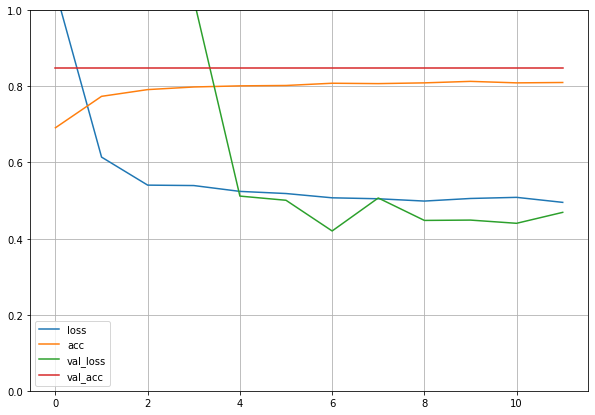

In [10]:
contrast_cnn = extractor()
processing.train_extractor(contrast_cnn, processing.contrust, processing.sagittal, processing.acl)


### Sagittal Meniscal

Epoch 1/50
51/51 [==============================] - ETA: 0s - loss: 1.0474 - acc: 0.5418
Epoch 00001: val_acc improved from -inf to 0.33628, saving model to /content/drive/My Drive/Models/contrust/Extractor/sagittal_meniscus.h5
51/51 [==============================] - 29s 572ms/step - loss: 1.0474 - acc: 0.5418 - val_loss: 57.1683 - val_acc: 0.3363
Epoch 2/50
51/51 [==============================] - ETA: 0s - loss: 0.7351 - acc: 0.6096
Epoch 00002: val_acc improved from 0.33628 to 0.36283, saving model to /content/drive/My Drive/Models/contrust/Extractor/sagittal_meniscus.h5
51/51 [==============================] - 25s 485ms/step - loss: 0.7351 - acc: 0.6096 - val_loss: 5.2679 - val_acc: 0.3628
Epoch 3/50
51/51 [==============================] - ETA: 0s - loss: 0.7012 - acc: 0.6195
Epoch 00003: val_acc improved from 0.36283 to 0.38938, saving model to /content/drive/My Drive/Models/contrust/Extractor/sagittal_meniscus.h5
51/51 [==============================] - 25s 483ms/step - loss: 0

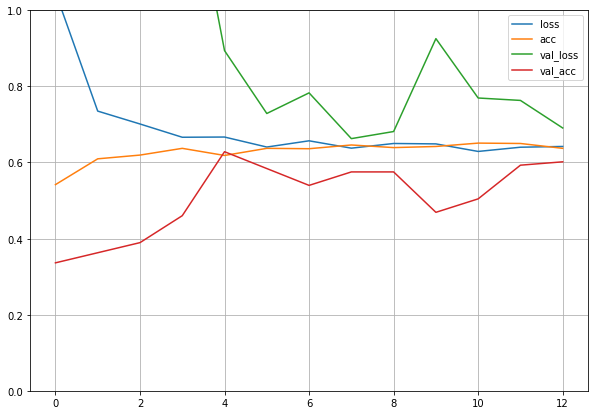

In [7]:
contrast_cnn = extractor()
processing.train_extractor(contrast_cnn, processing.contrust, processing.sagittal, processing.meniscal)

### Axial Abnormal

Epoch 1/50
51/51 [==============================] - ETA: 0s - loss: 0.7122 - acc: 0.7296
Epoch 00001: val_acc improved from -inf to 0.80531, saving model to /content/drive/My Drive/Models/contrust/Extractor/axial_abnormal.h5
51/51 [==============================] - 26s 510ms/step - loss: 0.7122 - acc: 0.7296 - val_loss: 2.5797 - val_acc: 0.8053
Epoch 2/50
51/51 [==============================] - ETA: 0s - loss: 0.5748 - acc: 0.7630
Epoch 00002: val_acc did not improve from 0.80531
51/51 [==============================] - 22s 433ms/step - loss: 0.5748 - acc: 0.7630 - val_loss: 0.6379 - val_acc: 0.6726
Epoch 3/50
51/51 [==============================] - ETA: 0s - loss: 0.5311 - acc: 0.7876
Epoch 00003: val_acc did not improve from 0.80531
51/51 [==============================] - 22s 428ms/step - loss: 0.5311 - acc: 0.7876 - val_loss: 0.6471 - val_acc: 0.6814
Epoch 4/50
51/51 [==============================] - ETA: 0s - loss: 0.4893 - acc: 0.7945
Epoch 00004: val_acc did not improve from 

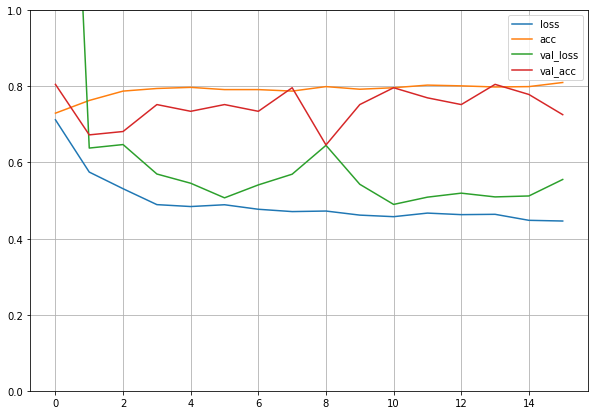

In [9]:
contrast_cnn = extractor()
processing.train_extractor(contrast_cnn, processing.contrust, processing.axial, processing.abnormal)

### Axial ACL

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/50
51/51 [==============================] - ETA: 0s - loss: 0.9346 - acc: 0.7060
Epoch 00001: val_acc improved from -inf to 0.84956, saving model to /content/drive/My Drive/Models/contrust/Extractor/axial_acl.h5
51/51 [==============================] - 26s 505ms/step - loss: 0.9346 - acc: 0.7060 - val_loss: 17.0065 - val_acc: 0.8496
Epoch 2/50
51/51 [==============================] - ETA: 0s - loss: 0.5824 - acc: 0.7532
Epoch 00002: val_acc did not improve from 0.84956
51/51 [==============================] - 22s 431ms/step - loss: 0.5824 - acc: 0.7532 - val_loss: 3.6009 - val_acc: 0.8496
Epoch 3/50
51/51 [==============================] - ETA: 0s - loss: 0.5204 - acc: 0.7847
Epoch 00003: val_acc did not improve from 0.84956
51/51 [==============================] - 22s 422ms/step - loss: 0.5204 - acc: 0.7847 - val_loss: 1.3722 - val_acc: 0.8496
Epoch 4/50
51/51 [==============================] - ETA: 0s

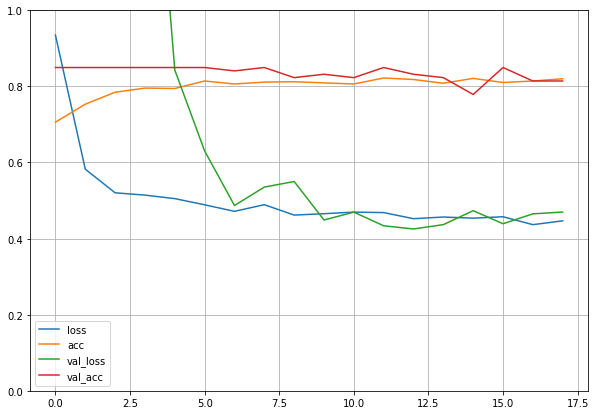

In [6]:
contrast_cnn = extractor()
processing.train_extractor(contrast_cnn, processing.contrust, processing.axial, processing.acl)

### Axial Meniscal

Epoch 1/50
51/51 [==============================] - ETA: 0s - loss: 0.9884 - acc: 0.6008
Epoch 00001: val_acc improved from -inf to 0.53982, saving model to /content/drive/My Drive/Models/contrust/Extractor/axial_meniscus.h5
51/51 [==============================] - 25s 487ms/step - loss: 0.9884 - acc: 0.6008 - val_loss: 3.5569 - val_acc: 0.5398
Epoch 2/50
51/51 [==============================] - ETA: 0s - loss: 0.7140 - acc: 0.6224
Epoch 00002: val_acc did not improve from 0.53982
51/51 [==============================] - 22s 438ms/step - loss: 0.7140 - acc: 0.6224 - val_loss: 5.2402 - val_acc: 0.4071
Epoch 3/50
51/51 [==============================] - ETA: 0s - loss: 0.7061 - acc: 0.6087
Epoch 00003: val_acc improved from 0.53982 to 0.54867, saving model to /content/drive/My Drive/Models/contrust/Extractor/axial_meniscus.h5
51/51 [==============================] - 24s 471ms/step - loss: 0.7061 - acc: 0.6087 - val_loss: 1.6669 - val_acc: 0.5487
Epoch 4/50
51/51 [========================

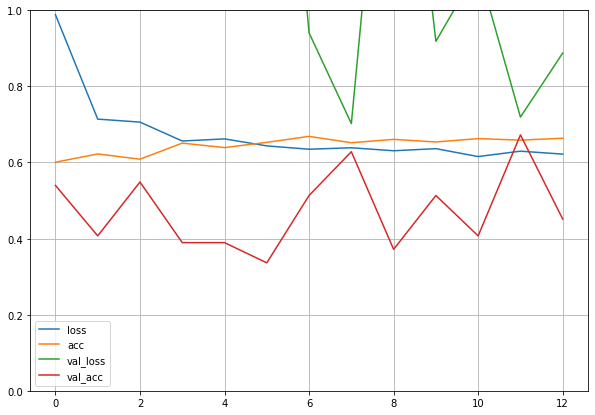

In [8]:
contrast_cnn = extractor()
processing.train_extractor(contrast_cnn, processing.contrust, processing.axial, processing.meniscal)

### Coronal Abnormal

Epoch 1/50
51/51 [==============================] - ETA: 0s - loss: 1.2237 - acc: 0.6450
Epoch 00001: val_acc improved from -inf to 0.80531, saving model to /content/drive/My Drive/Models/contrust/Extractor/coronal_abnormal.h5
51/51 [==============================] - 23s 456ms/step - loss: 1.2237 - acc: 0.6450 - val_loss: 0.7248 - val_acc: 0.8053
Epoch 2/50
51/51 [==============================] - ETA: 0s - loss: 0.9567 - acc: 0.7011
Epoch 00002: val_acc did not improve from 0.80531
51/51 [==============================] - 22s 437ms/step - loss: 0.9567 - acc: 0.7011 - val_loss: 0.7903 - val_acc: 0.3274
Epoch 3/50
51/51 [==============================] - ETA: 0s - loss: 0.6086 - acc: 0.7601
Epoch 00003: val_acc did not improve from 0.80531
51/51 [==============================] - 22s 424ms/step - loss: 0.6086 - acc: 0.7601 - val_loss: 1.2348 - val_acc: 0.7876
Epoch 4/50
51/51 [==============================] - ETA: 0s - loss: 0.4977 - acc: 0.8053
Epoch 00004: val_acc did not improve fro

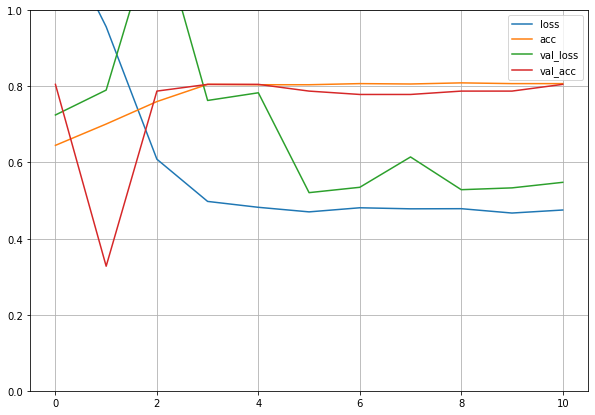

In [9]:
contrast_cnn = extractor()
processing.train_extractor(contrast_cnn, processing.contrust, processing.coronal, processing.abnormal)

### Coronal ACL

Epoch 1/50
51/51 [==============================] - ETA: 0s - loss: 0.8906 - acc: 0.6686
Epoch 00001: val_acc improved from -inf to 0.83186, saving model to /content/drive/My Drive/Models/contrust/Extractor/coronal_acl.h5
51/51 [==============================] - 24s 461ms/step - loss: 0.8906 - acc: 0.6686 - val_loss: 0.7254 - val_acc: 0.8319
Epoch 2/50
51/51 [==============================] - ETA: 0s - loss: 0.5829 - acc: 0.7719
Epoch 00002: val_acc improved from 0.83186 to 0.84956, saving model to /content/drive/My Drive/Models/contrust/Extractor/coronal_acl.h5
51/51 [==============================] - 24s 473ms/step - loss: 0.5829 - acc: 0.7719 - val_loss: 0.4624 - val_acc: 0.8496
Epoch 3/50
51/51 [==============================] - ETA: 0s - loss: 0.5461 - acc: 0.7866
Epoch 00003: val_acc did not improve from 0.84956
51/51 [==============================] - 22s 435ms/step - loss: 0.5461 - acc: 0.7866 - val_loss: 0.5768 - val_acc: 0.8496
Epoch 4/50
51/51 [==============================

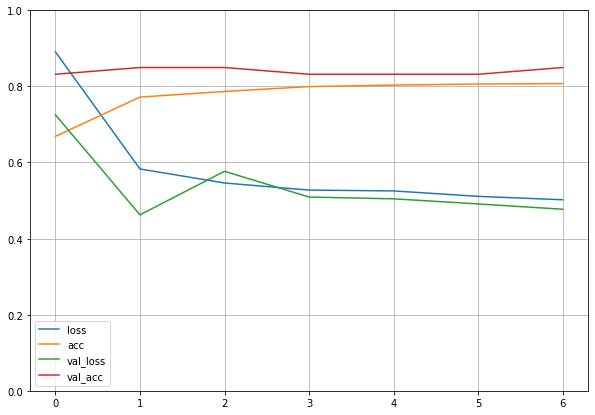

In [10]:
contrast_cnn = extractor()
processing.train_extractor(contrast_cnn, processing.contrust, processing.coronal, processing.acl)

### Coronal Meniscal

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/50
51/51 [==============================] - ETA: 0s - loss: 1.1174 - acc: 0.5477
Epoch 00001: val_acc improved from -inf to 0.66372, saving model to /content/drive/My Drive/Models/contrust/Extractor/coronal_meniscus.h5
51/51 [==============================] - 26s 508ms/step - loss: 1.1174 - acc: 0.5477 - val_loss: 10.0215 - val_acc: 0.6637
Epoch 2/50
51/51 [==============================] - ETA: 0s - loss: 0.7669 - acc: 0.5851
Epoch 00002: val_acc did not improve from 0.66372
51/51 [==============================] - 22s 434ms/step - loss: 0.7669 - acc: 0.5851 - val_loss: 1.5734 - val_acc: 0.5841
Epoch 3/50
51/51 [==============================] - ETA: 0s - loss: 0.7192 - acc: 0.5949
Epoch 00003: val_acc did not improve from 0.66372
51/51 [==============================] - 22s 424ms/step - loss: 0.7192 - acc: 0.5949 - val_loss: 1.2145 - val_acc: 0.5398
Epoch 4/50
51/51 [==============================] - 

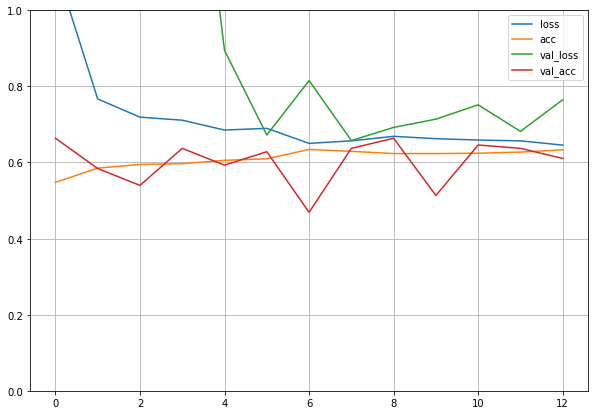

In [6]:
contrast_cnn = extractor()
processing.train_extractor(contrast_cnn, processing.contrust, processing.coronal, processing.meniscal)

# Train Classifiers

In [0]:
def classifier():
  classifier = Sequential()
  classifier.add(Dense(512, input_dim=256))
  classifier.add(BatchNormalization(axis=1))
  classifier.add(Activation('relu'))
  classifier.add(Dense(1))
  classifier.add(Activation('sigmoid'))
  classifier.compile(loss='binary_crossentropy', optimizer=optimizers.Adam(1e-7), metrics=['acc'])
  return classifier


### Sagittal Abnormal

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 256, 256, 32)      896       
_________________________________________________________________
batch_normalization_24 (Batc (None, 256, 256, 32)      1024      
_________________________________________________________________
activation_24 (Activation)   (None, 256, 256, 32)      0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 254, 254, 32)      9248      
_________________________________________________________________
batch_normalization_25 (Batc (None, 254, 254, 32)      1016      
_________________________________________________________________
activation_25 (Activation)   (None, 254, 254, 32)      0         
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 127, 127, 32)     

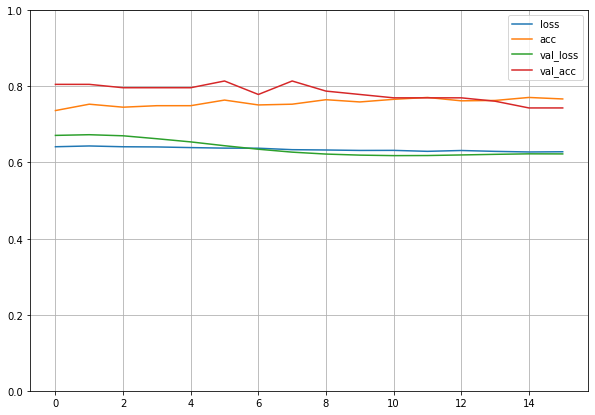

In [28]:
contrast_cnn = None
loaded_model = processing.load_model(processing.contrust, processing.sagittal, processing.abnormal, processing.extractor)

for i in range(7):
  loaded_model.pop()

extractor_model = loaded_model
extractor_model.summary()
#making classifier
classifier_model = classifier()
#train classifier
processing.train_classifier(extractor_model, classifier_model, processing.contrust, processing.sagittal, processing.abnormal)


### Sagittal ACL

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_32 (Conv2D)           (None, 256, 256, 32)      896       
_________________________________________________________________
batch_normalization_32 (Batc (None, 256, 256, 32)      1024      
_________________________________________________________________
activation_32 (Activation)   (None, 256, 256, 32)      0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 254, 254, 32)      9248      
_________________________________________________________________
batch_normalization_33 (Batc (None, 254, 254, 32)      1016      
_________________________________________________________________
activation_33 (Activation)   (None, 254, 254, 32)      0         
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 127, 127, 32)     

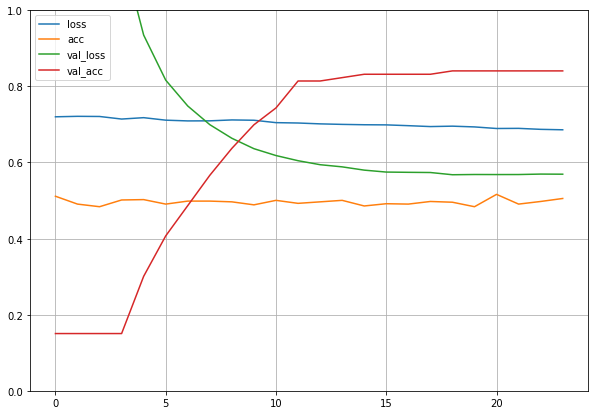

In [30]:
loaded_model = processing.load_model(processing.contrust, processing.sagittal, processing.acl, processing.extractor)

for i in range(7):
  loaded_model.pop()

extractor_model = loaded_model
extractor_model.summary()
#making classifier
classifier_model = classifier()
#train classifier
processing.train_classifier(extractor_model, classifier_model, processing.contrust, processing.sagittal, processing.acl)


### Sagittal Meniscal

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 256, 256, 32)      896       
_________________________________________________________________
batch_normalization_8 (Batch (None, 256, 256, 32)      1024      
_________________________________________________________________
activation_8 (Activation)    (None, 256, 256, 32)      0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 254, 254, 32)      9248      
_________________________________________________________________
batch_normalization_9 (Batch (None, 254, 254, 32)      1016      
_________________________________________________________________
activation_9 (Activation)    (None, 254, 254, 32)      0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 127, 127, 32)     

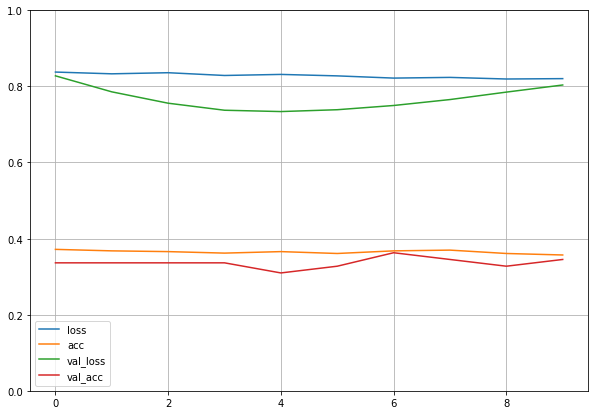

In [31]:
loaded_model = processing.load_model(processing.contrust, processing.sagittal, processing.meniscal, processing.extractor)

for i in range(7):
  loaded_model.pop()

extractor_model = loaded_model
extractor_model.summary()
#making classifier
classifier_model = classifier()
#train classifier
processing.train_classifier(extractor_model, classifier_model, processing.contrust, processing.sagittal, processing.meniscal)

### Axial Abnormal

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 256, 256, 32)      896       
_________________________________________________________________
batch_normalization_24 (Batc (None, 256, 256, 32)      1024      
_________________________________________________________________
activation_24 (Activation)   (None, 256, 256, 32)      0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 254, 254, 32)      9248      
_________________________________________________________________
batch_normalization_25 (Batc (None, 254, 254, 32)      1016      
_________________________________________________________________
activation_25 (Activation)   (None, 254, 254, 32)      0         
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 127, 127, 32)     

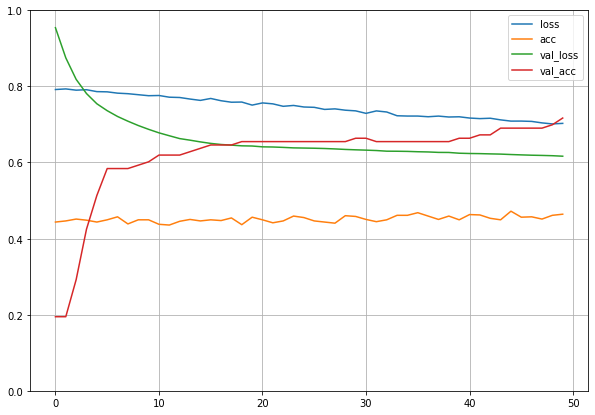

In [32]:
loaded_model = processing.load_model(processing.contrust, processing.axial, processing.abnormal, processing.extractor)

for i in range(7):
  loaded_model.pop()

extractor_model = loaded_model
extractor_model.summary()
#making classifier
classifier_model = classifier()
#train classifier
processing.train_classifier(extractor_model, classifier_model, processing.contrust, processing.axial, processing.abnormal)

### Axial ACL

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 256, 256, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 256, 256, 32)      1024      
_________________________________________________________________
activation (Activation)      (None, 256, 256, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 254, 254, 32)      9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 254, 254, 32)      1016      
_________________________________________________________________
activation_1 (Activation)    (None, 254, 254, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 32)      0

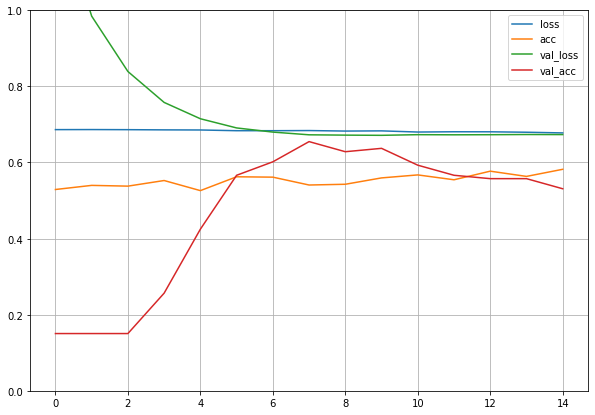

In [33]:
loaded_model = processing.load_model(processing.contrust, processing.axial, processing.acl, processing.extractor)

for i in range(7):
  loaded_model.pop()

extractor_model = loaded_model
extractor_model.summary()
#making classifier
classifier_model = classifier()
#train classifier
processing.train_classifier(extractor_model, classifier_model, processing.contrust, processing.axial, processing.acl)

### Axial Meniscal

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 256, 256, 32)      896       
_________________________________________________________________
batch_normalization_16 (Batc (None, 256, 256, 32)      1024      
_________________________________________________________________
activation_16 (Activation)   (None, 256, 256, 32)      0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 254, 254, 32)      9248      
_________________________________________________________________
batch_normalization_17 (Batc (None, 254, 254, 32)      1016      
_________________________________________________________________
activation_17 (Activation)   (None, 254, 254, 32)      0         
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 127, 127, 32)     

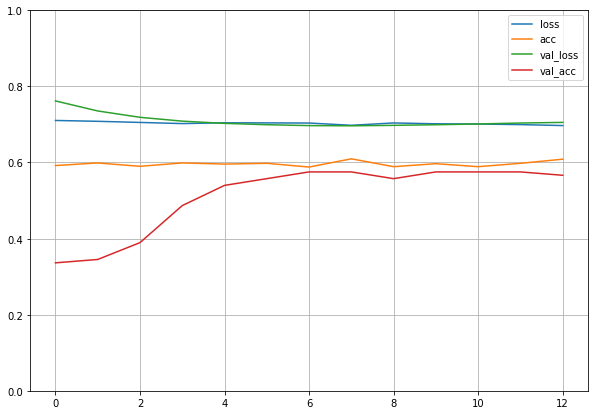

In [34]:
loaded_model = processing.load_model(processing.contrust, processing.axial, processing.meniscal, processing.extractor)

for i in range(7):
  loaded_model.pop()

extractor_model = loaded_model
extractor_model.summary()
#making classifier
classifier_model = classifier()
#train classifier
processing.train_classifier(extractor_model, classifier_model, processing.contrust, processing.axial, processing.meniscal)

### Coronal Abnormal

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 256, 256, 32)      896       
_________________________________________________________________
batch_normalization_24 (Batc (None, 256, 256, 32)      1024      
_________________________________________________________________
activation_24 (Activation)   (None, 256, 256, 32)      0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 254, 254, 32)      9248      
_________________________________________________________________
batch_normalization_25 (Batc (None, 254, 254, 32)      1016      
_________________________________________________________________
activation_25 (Activation)   (None, 254, 254, 32)      0         
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 127, 127, 32)     

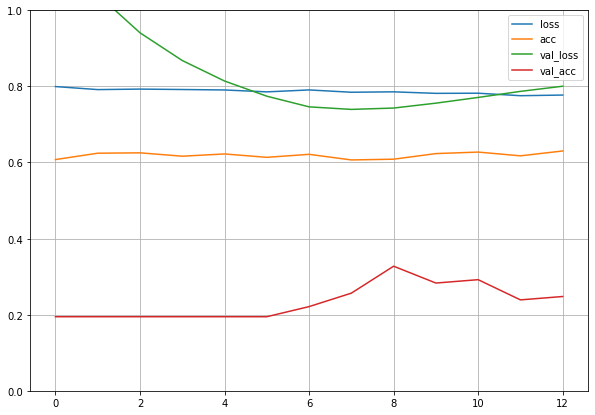

In [35]:
loaded_model = processing.load_model(processing.contrust, processing.coronal, processing.abnormal, processing.extractor)

for i in range(7):
  loaded_model.pop()

extractor_model = loaded_model
extractor_model.summary()
#making classifier
classifier_model = classifier()
#train classifier
processing.train_classifier(extractor_model, classifier_model, processing.contrust, processing.coronal, processing.abnormal)

### Coronal ACL

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_32 (Conv2D)           (None, 256, 256, 32)      896       
_________________________________________________________________
batch_normalization_32 (Batc (None, 256, 256, 32)      1024      
_________________________________________________________________
activation_32 (Activation)   (None, 256, 256, 32)      0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 254, 254, 32)      9248      
_________________________________________________________________
batch_normalization_33 (Batc (None, 254, 254, 32)      1016      
_________________________________________________________________
activation_33 (Activation)   (None, 254, 254, 32)      0         
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 127, 127, 32)     

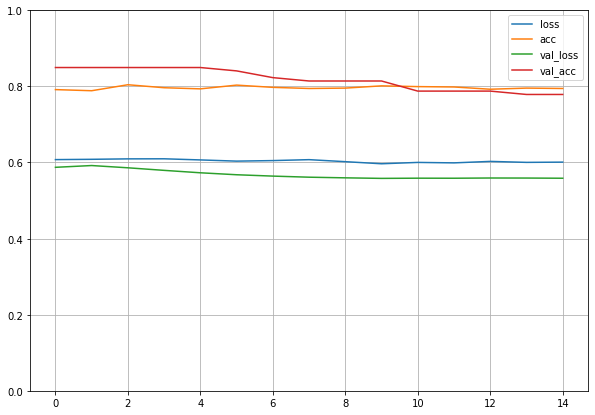

In [36]:
loaded_model = processing.load_model(processing.contrust, processing.coronal, processing.acl, processing.extractor)

for i in range(7):
  loaded_model.pop()

extractor_model = loaded_model
extractor_model.summary()
#making classifier
classifier_model = classifier()
#train classifier
processing.train_classifier(extractor_model, classifier_model, processing.contrust, processing.coronal, processing.acl)

### Coronal Meniscal

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 256, 256, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 256, 256, 32)      1024      
_________________________________________________________________
activation (Activation)      (None, 256, 256, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 254, 254, 32)      9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 254, 254, 32)      1016      
_________________________________________________________________
activation_1 (Activation)    (None, 254, 254, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 32)      0

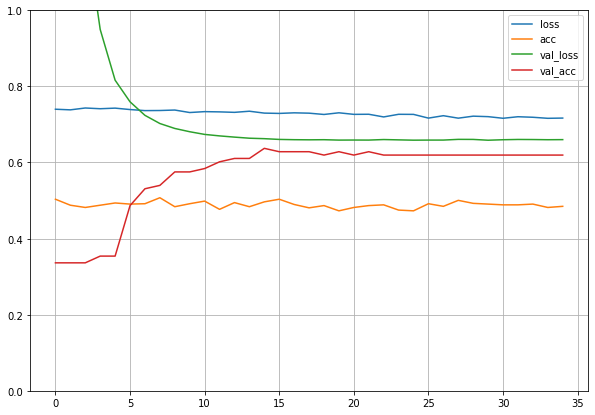

In [37]:
loaded_model = processing.load_model(processing.contrust, processing.coronal, processing.meniscal, processing.extractor)

for i in range(7):
  loaded_model.pop()

extractor_model = loaded_model
extractor_model.summary()
#making classifier
classifier_model = classifier()
#train classifier
processing.train_classifier(extractor_model, classifier_model, processing.contrust, processing.coronal, processing.meniscal)

# Training Regressor

In [0]:
def regressor():  
  log_reg = tf.keras.Sequential()
  log_reg.add(Dense(units=1 , activation = 'sigmoid' , input_dim = 3))
  log_reg.compile(loss='binary_crossentropy',optimizer = keras.optimizers.Adam(1e-2),metrics=['acc'])
  return log_reg

#Abnormal

Epoch 1/50
47/51 [==========================>...] - ETA: 0s - loss: 0.6065 - acc: 0.7277
Epoch 00001: val_acc improved from -inf to 0.80531, saving model to /content/drive/My Drive/Models/contrust/Regressor/abnormal.h5
51/51 [==============================] - 0s 7ms/step - loss: 0.5985 - acc: 0.7345 - val_loss: 0.5132 - val_acc: 0.8053
Epoch 2/50
49/51 [===========================>..] - ETA: 0s - loss: 0.4916 - acc: 0.8112
Epoch 00002: val_acc did not improve from 0.80531
51/51 [==============================] - 0s 3ms/step - loss: 0.4949 - acc: 0.8083 - val_loss: 0.4873 - val_acc: 0.8053
Epoch 3/50
40/51 [======================>.......] - ETA: 0s - loss: 0.4891 - acc: 0.8050
Epoch 00003: val_acc did not improve from 0.80531
51/51 [==============================] - 0s 3ms/step - loss: 0.4849 - acc: 0.8083 - val_loss: 0.4855 - val_acc: 0.8053
Epoch 4/50
47/51 [==========================>...] - ETA: 0s - loss: 0.4873 - acc: 0.8053
Epoch 00004: val_acc did not improve from 0.80531
51/51 [

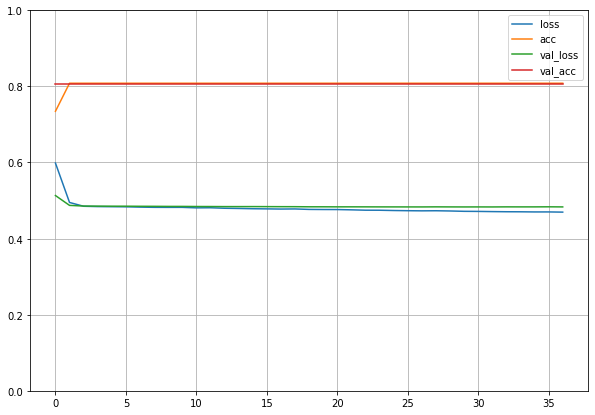

In [9]:
# Loading sagittal abnormal extractor model
loaded_model_saggital = processing.load_model(processing.contrust, processing.sagittal, processing.abnormal, processing.extractor)
for i in range(7):
  loaded_model_saggital.pop()
sagittal_extractor = loaded_model_saggital
# Loading axial abnormal extractor model
loaded_model_axial = processing.load_model(processing.contrust, processing.axial, processing.abnormal, processing.extractor)
for i in range(7):
  loaded_model_axial.pop()
axial_extractor = loaded_model_axial
# Loading sagittal abnormal extractor model
loaded_model_coronal = processing.load_model(processing.contrust, processing.coronal, processing.abnormal, processing.extractor)
for i in range(7):
  loaded_model_coronal.pop()
coronal_extractor = loaded_model_coronal
log_reg = regressor()
processing.train_regressor(log_reg, axial_extractor, sagittal_extractor, coronal_extractor, processing.contrust, processing.abnormal)

#ACL

Epoch 1/50
45/51 [=========================>....] - ETA: 0s - loss: 0.5369 - acc: 0.8122
Epoch 00001: val_acc improved from -inf to 0.84956, saving model to /content/drive/My Drive/Models/contrust/Regressor/acl.h5
51/51 [==============================] - 0s 5ms/step - loss: 0.5323 - acc: 0.8122 - val_loss: 0.4512 - val_acc: 0.8496
Epoch 2/50
44/51 [========================>.....] - ETA: 0s - loss: 0.4893 - acc: 0.8125
Epoch 00002: val_acc did not improve from 0.84956
51/51 [==============================] - 0s 3ms/step - loss: 0.4891 - acc: 0.8122 - val_loss: 0.4347 - val_acc: 0.8496
Epoch 3/50
48/51 [===========================>..] - ETA: 0s - loss: 0.4873 - acc: 0.8115
Epoch 00003: val_acc did not improve from 0.84956
51/51 [==============================] - 0s 3ms/step - loss: 0.4862 - acc: 0.8122 - val_loss: 0.4327 - val_acc: 0.8496
Epoch 4/50
45/51 [=========================>....] - ETA: 0s - loss: 0.4760 - acc: 0.8189
Epoch 00004: val_acc did not improve from 0.84956
51/51 [=====

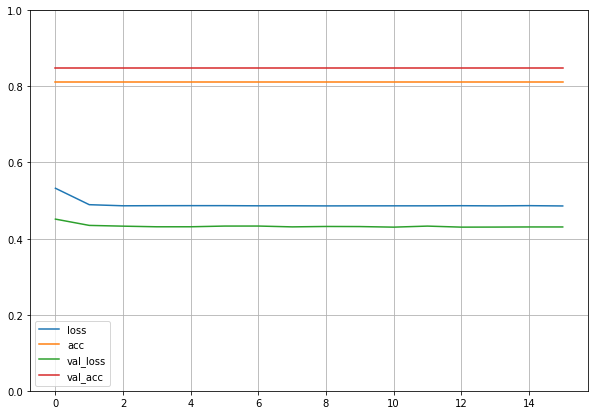

In [10]:
# Loading sagittal abnormal extractor model
loaded_model_saggital = processing.load_model(processing.contrust, processing.sagittal, processing.acl, processing.extractor)
for i in range(7):
  loaded_model_saggital.pop()
sagittal_extractor = loaded_model_saggital
# Loading axial abnormal extractor model
loaded_model_axial = processing.load_model(processing.contrust, processing.axial, processing.acl, processing.extractor)
for i in range(7):
  loaded_model_axial.pop()
axial_extractor = loaded_model_axial
# Loading sagittal abnormal extractor model
loaded_model_coronal = processing.load_model(processing.contrust, processing.coronal, processing.acl, processing.extractor)
for i in range(7):
  loaded_model_coronal.pop()
coronal_extractor = loaded_model_coronal
log_reg = regressor()
processing.train_regressor(log_reg, axial_extractor, sagittal_extractor, coronal_extractor, processing.contrust, processing.acl)

#Meniscal

Epoch 1/50
44/51 [========================>.....] - ETA: 0s - loss: 0.6723 - acc: 0.5909
Epoch 00001: val_acc improved from -inf to 0.66372, saving model to /content/drive/My Drive/Models/contrust/Regressor/meniscus.h5
51/51 [==============================] - 0s 5ms/step - loss: 0.6765 - acc: 0.5851 - val_loss: 0.6414 - val_acc: 0.6637
Epoch 2/50
41/51 [=======================>......] - ETA: 0s - loss: 0.6563 - acc: 0.6390
Epoch 00002: val_acc did not improve from 0.66372
51/51 [==============================] - 0s 3ms/step - loss: 0.6519 - acc: 0.6470 - val_loss: 0.6399 - val_acc: 0.6637
Epoch 3/50
46/51 [==========================>...] - ETA: 0s - loss: 0.6532 - acc: 0.6446
Epoch 00003: val_acc did not improve from 0.66372
51/51 [==============================] - 0s 3ms/step - loss: 0.6516 - acc: 0.6470 - val_loss: 0.6394 - val_acc: 0.6637
Epoch 4/50
48/51 [===========================>..] - ETA: 0s - loss: 0.6451 - acc: 0.6562
Epoch 00004: val_acc did not improve from 0.66372
51/51 [

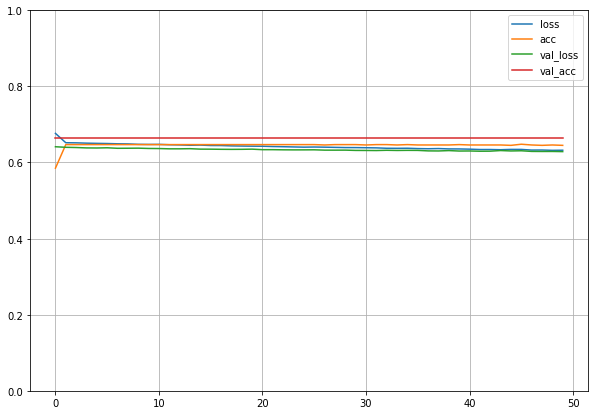

In [11]:
# Loading sagittal abnormal extractor model
loaded_model_saggital = processing.load_model(processing.contrust, processing.sagittal, processing.meniscal, processing.extractor)
for i in range(7):
  loaded_model_saggital.pop()
sagittal_extractor = loaded_model_saggital
# Loading axial abnormal extractor model
loaded_model_axial = processing.load_model(processing.contrust, processing.axial, processing.meniscal, processing.extractor)
for i in range(7):
  loaded_model_axial.pop()
axial_extractor = loaded_model_axial
# Loading sagittal abnormal extractor model
loaded_model_coronal = processing.load_model(processing.contrust, processing.coronal, processing.meniscal, processing.extractor)
for i in range(7):
  loaded_model_coronal.pop()
coronal_extractor = loaded_model_coronal
log_reg = regressor()
processing.train_regressor(log_reg, axial_extractor, sagittal_extractor, coronal_extractor, processing.contrust, processing.meniscal)